In [2]:
import math 
import pandas_datareader as web 
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  #load_model
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:

df = pd.read_csv('../input/OGEN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,1.24,1.28,1.1300,1.180,1.180,8191900
1,2020-07-28,1.15,1.16,1.0400,1.110,1.110,5583700
2,2020-07-29,1.06,1.16,1.0400,1.120,1.120,5993300
3,2020-07-30,1.14,1.22,1.1000,1.150,1.150,8236900
4,2020-07-31,1.11,1.27,1.1100,1.210,1.210,5984600
...,...,...,...,...,...,...,...
248,2021-07-21,0.62,0.67,0.6200,0.650,0.650,2090300
249,2021-07-22,0.64,0.70,0.6200,0.660,0.660,3738300
250,2021-07-23,0.65,0.70,0.6400,0.640,0.640,2068500
251,2021-07-26,0.63,0.65,0.6100,0.630,0.630,1673200


In [91]:
# get the number of rows and columns in the data set
df.shape

(230, 7)

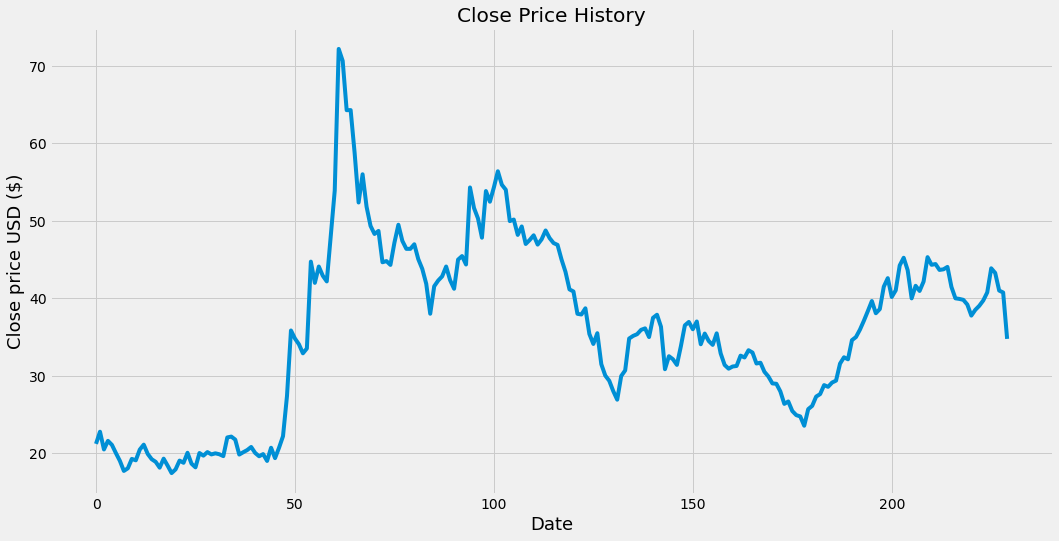

In [92]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [93]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

184

In [94]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.06889617],
       [0.09758772],
       [0.05573829],
       [0.0760234 ],
       [0.06652045],
       [0.04714913],
       [0.02887427],
       [0.00511694],
       [0.01133039],
       [0.03344298],
       [0.03015349],
       [0.05537279],
       [0.06706872],
       [0.04513887],
       [0.03271197],
       [0.02649852],
       [0.01279238],
       [0.03399119],
       [0.01754384],
       [0.        ],
       [0.00877191],
       [0.02942248],
       [0.02430556],
       [0.0478801 ],
       [0.0222953 ],
       [0.01352339],
       [0.04733187],
       [0.04111842],
       [0.04952484],
       [0.0440424 ],
       [0.04660086],
       [0.04440786],
       [0.0400219 ],
       [0.0840643 ],
       [0.08607455],
       [0.07894735],
       [0.04367688],
       [0.04915932],
       [0.0542763 ],
       [0.06158624],
       [0.04751459],
       [0.03965643],
       [0.04477338],
       [0.0286915 ],
       [0.05975874],
       [0.03527043],
       [0.05975874],
       [0.086

In [95]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.06889617, 0.09758772, 0.05573829, 0.0760234 , 0.06652045,
       0.04714913, 0.02887427, 0.00511694, 0.01133039, 0.03344298,
       0.03015349, 0.05537279, 0.06706872, 0.04513887, 0.03271197,
       0.02649852, 0.01279238, 0.03399119, 0.01754384, 0.        ,
       0.00877191, 0.02942248, 0.02430556, 0.0478801 , 0.0222953 ,
       0.01352339, 0.04733187, 0.04111842, 0.04952484, 0.0440424 ,
       0.04660086, 0.04440786, 0.0400219 , 0.0840643 , 0.08607455,
       0.07894735, 0.04367688, 0.04915932, 0.0542763 , 0.06158624,
       0.04751459, 0.03965643, 0.04477338, 0.0286915 , 0.05975874,
       0.03527043, 0.05975874, 0.08698827, 0.18165202, 0.33625727,
       0.31725148, 0.30372807, 0.28234652, 0.29385963, 0.49853802,
       0.44846496, 0.48702483, 0.46527779, 0.45193714, 0.56030705]), array([0.09758772, 0.05573829, 0.0760234 , 0.06652045, 0.04714913,
       0.02887427, 0.00511694, 0.01133039, 0.03344298, 0.03015349,
       0.05537279, 0.06706872, 0.04513887, 0.03271197, 0.02

In [96]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(124, 60, 1)

In [98]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [99]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

124/124 [==============================] - 5s 20ms/step - loss: 0.0476


In [101]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [102]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [103]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [104]:
# get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [105]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.219952727870775

/Users/anhnguyenhoang/miniconda/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


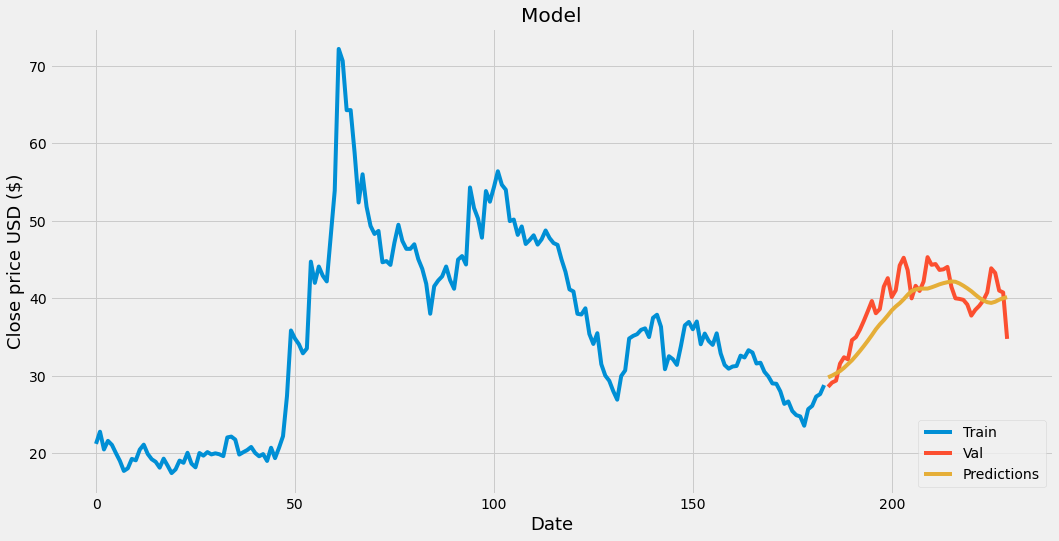

In [106]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [107]:
# show the valid and predicted prices
valid

,Close,Prediction
184,28.580000,29.799025
185,29.129999,30.029678
186,29.379999,30.310596
187,31.570000,30.616343
188,32.389999,31.027052
189,32.130001,31.515045
190,34.599998,32.004784
191,35.000000,32.588276
192,35.950001,33.207520
193,37.110001,33.855026


In [108]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
valid.to_csv('../out/LSTM/OGEN.csv')
valid

,Close,Prediction
Date,,
2021-05-21,28.580000,29.799025
2021-05-24,29.129999,30.029678
2021-05-25,29.379999,30.310596
2021-05-26,31.570000,30.616343
2021-05-27,32.389999,31.027052
2021-05-28,32.130001,31.515045
2021-06-01,34.599998,32.004784
2021-06-02,35.000000,32.588276
2021-06-03,35.950001,33.207520
